In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

In [19]:
df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:title={'center':'Quality vs alcohol'}, xlabel='quality', ylabel='alcohol'>

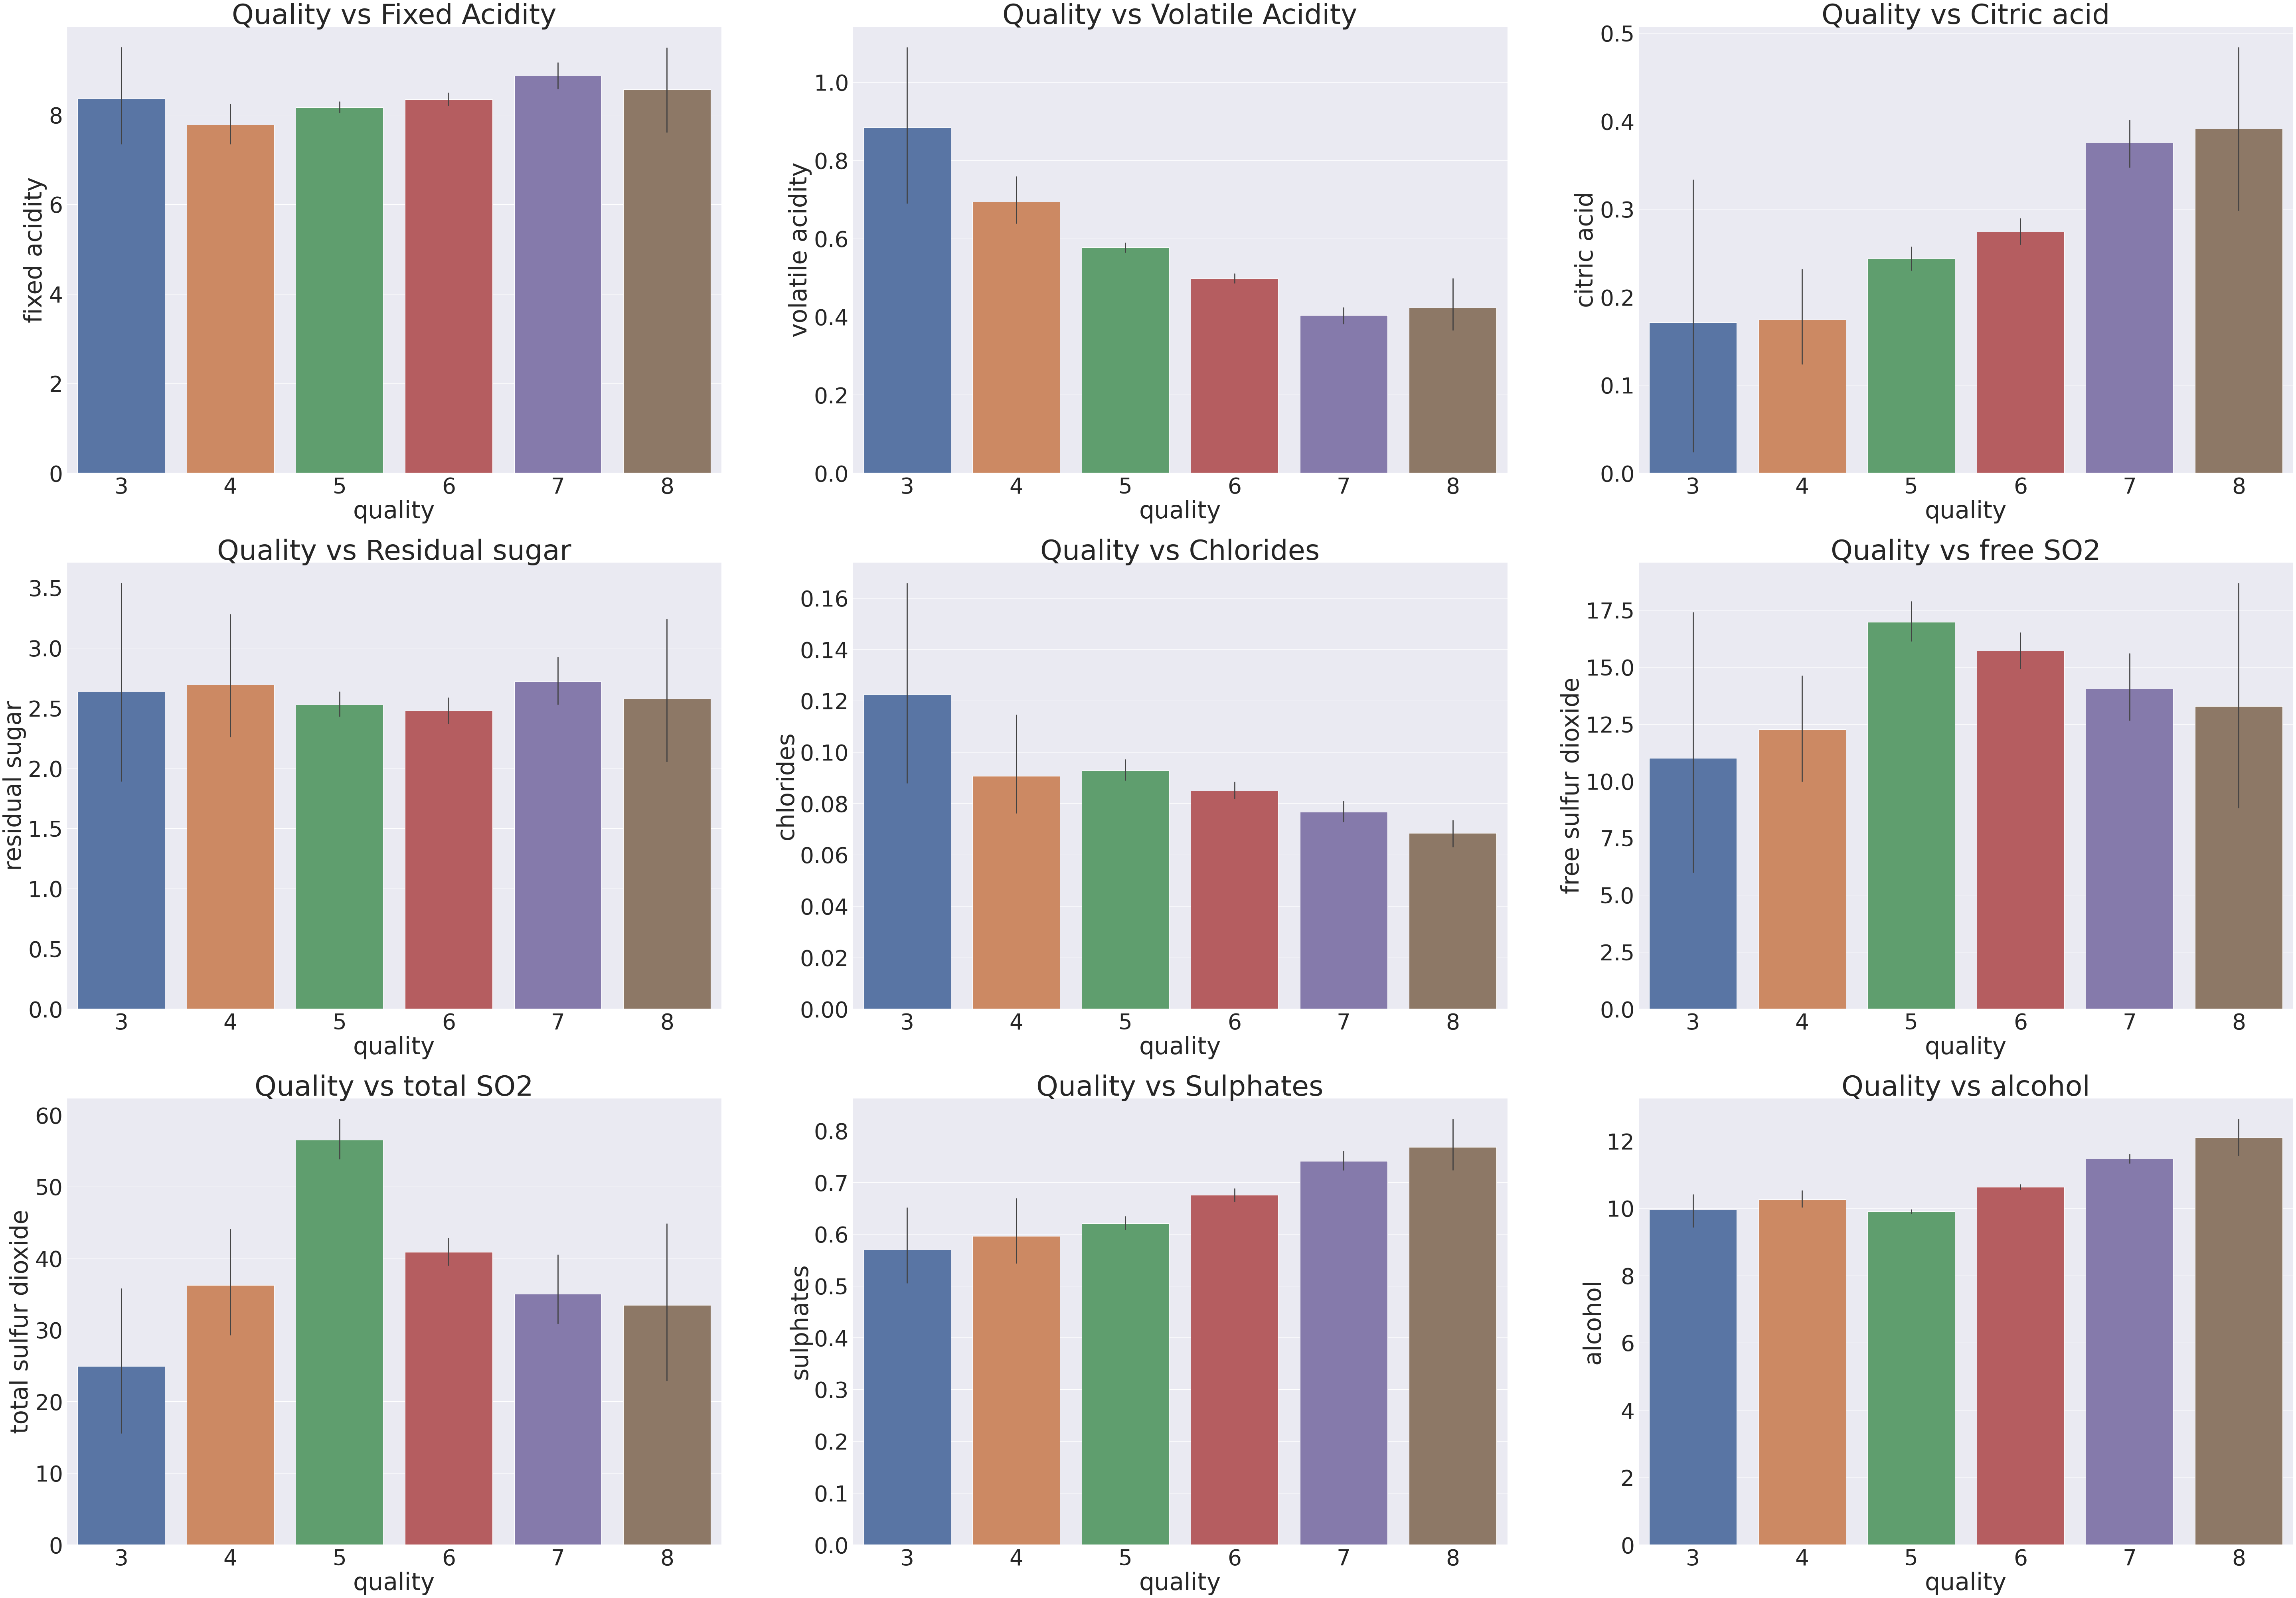

In [21]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=70)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs Residual sugar",fontsize=70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs free SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

plt.subplot(337)
plt.title("Quality vs total SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=70)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=70)
sns.barplot(x='quality',y='alcohol',data=df)

In [22]:
bins = (2,6.5,8)
classes = ['bad','good']
df['quality'] = pd.cut(df['quality'],bins=bins,labels=classes)

In [23]:
label_quality =  LabelEncoder()

In [24]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [25]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

**0 indicates bad and 1 indicates good**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Quality vs Xount'}, xlabel='quality', ylabel='count'>

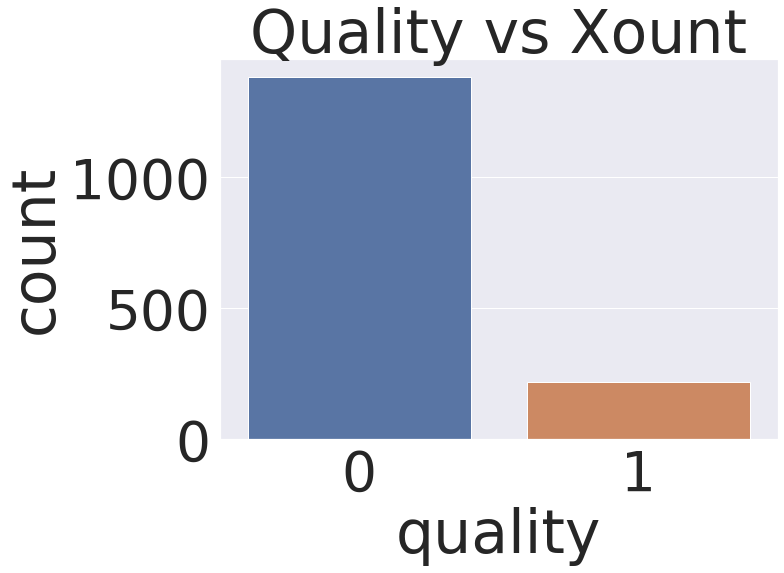

In [26]:
plt.figure(figsize=(10,7))
plt.title("Quality vs Xount")
sns.countplot(df['quality'])

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [28]:
x = df.drop('quality',axis=1)
y  = df['quality']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [30]:
sc = StandardScaler()

In [31]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

**Random Forest Classifier**

In [32]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)

In [33]:
pred1 = accuracy_score(y_test,pred_rf)
print(pred1*100)

90.9375


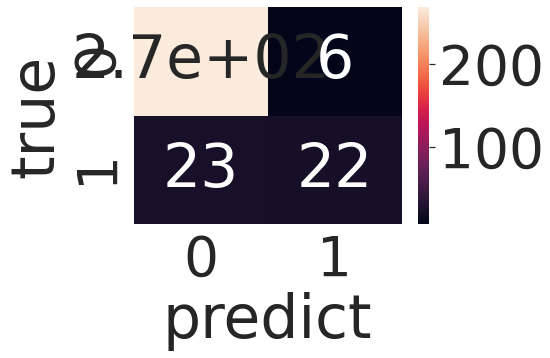

In [34]:
cm1 = confusion_matrix(y_test, pred_rf)
ax1 = sns.heatmap(cm1,annot=True)
ax1.set(xlabel='predict',ylabel='true')
plt.show()

**Logistic Regression**

In [35]:
lr = LogisticRegression().fit(x_train,y_train)

logistic regression accuracy score:  88.75


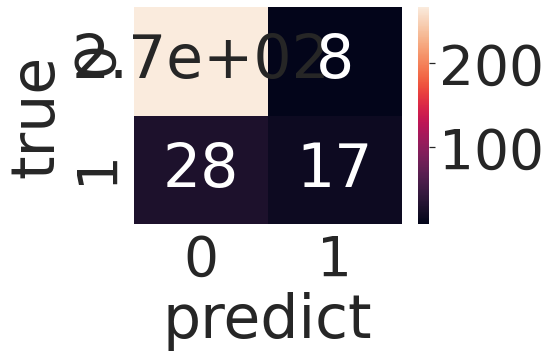

In [36]:
pred_lr = lr.predict(x_test)
cm2 = confusion_matrix(y_test,pred_lr)
ax2 = sns.heatmap(cm2,annot=True)
ax2.set(xlabel='predict',ylabel='true')
pred2 = accuracy_score(y_test,pred_lr)
print("logistic regression accuracy score: ",pred2*100)